In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

boston = pd.read_csv(
    r"/home/ahmed/Ai/Kaggle-Competitions-Notebooks/boston House price prediction/Date_set/train.csv"
)
boston

# 1. statistical analysis


In [ ]:
boston.info()

In [ ]:
boston.describe()

##### There is a discrepancy between the data


In [ ]:
null_columns = []

for col in boston.columns:
    if boston[col].isna().sum() > 0:
        null_columns.append([boston[col].isna().sum() * 100 / len(boston), col])

null_columns.sort()
null_columns.reverse()
null_columns

##### remove all columns with more than 40% missing data


In [ ]:
boston["SalePrice"].describe()

# 2. Visualizations


In [179]:
class Visualizations:
    def __init__(self, data):
        self.data = data

    def distribution(self, col, with_log):
        for i in col:
            dataset = self.data.copy()
            if with_log:
                dataset[col] = np.log(dataset[col])

            plt.figure(figsize=(4, 3))
            sns.histplot(data=dataset, x=i, kde=True)
            plt.show()
        return

    def Scatter(self, col, with_log):

        for j, i in enumerate(col):
            dataset = self.data.copy()
            if with_log:
                dataset[col] = np.log(dataset[col])

            plt.figure(figsize=(4, 3))
            sns.regplot(data=dataset, x=i, y="SalePrice")
            plt.show()
        return

    def Heat_map(self, col):
        df = self.data[col]
        df["SalePrice"] = self.data["SalePrice"]
        corr = df.corr()
        plt.figure(figsize=(25, 13))
        sns.heatmap(corr, annot=True)

    def years_lineplot(self, year_columns):
        plt.figure(figsize=(20, 20))

        for i, col in enumerate(year_columns):
            plt.subplot(6, 4, i + 1)
            original_dataset = self.data.copy()
            original_dataset.groupby(col)["SalePrice"].median().plot()
            plt.xlabel(col)
            plt.ylabel("Median House Price")
            plt.title("House Price vs YearSold")

    def null_columns_relation(self, col):
        plt.figure(figsize=(20, 20))

        for i, col in enumerate(col):
            temp_dataset = self.data.copy()
            # indicates 1 if value is null otherwize 0
            temp_dataset[col] = np.where(temp_dataset[col].isnull(), 1, 0)
            plt.subplot(6, 4, i + 1)
            # Now we need to create a bar plot to visualize the SalePrice of null values
            sns.barplot(
                data=temp_dataset,
                x=col,
                y="SalePrice",
                width=0.2,
                saturation=0.5,
                errorbar=None,
            )
            plt.yticks(np.arange(0, 200000, 25000))

    def numerical_discrete_columns(self, numerical_discrete):
        plt.figure(figsize=(30, 30))
        for i, col in enumerate(numerical_discrete):
            plt.subplot(5, 4, i + 1)
            sns.barplot(
                data=self.data,
                x=col,
                y="SalePrice",
                width=0.5,
                estimator=np.std,
                saturation=0.5,
                errorbar=None,
            )
            plt.xticks(rotation=90)
            plt.xlabel(col)
            plt.ylabel("SalePrice")
            plt.title(col)


visual = Visualizations(boston)

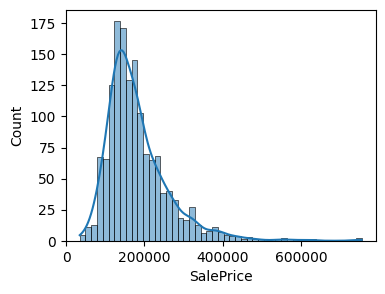

skew 1.8828757597682129
kurt 6.536281860064529


In [180]:
visual.distribution(["SalePrice"], 0)

print("skew", boston["SalePrice"].skew())
print("kurt", boston["SalePrice"].kurt())

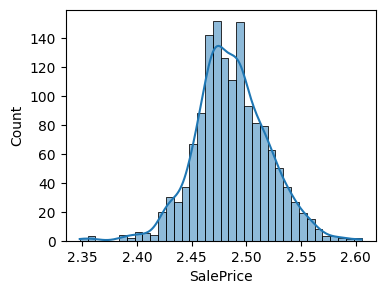

In [167]:
visual.distribution(["SalePrice"], 1)

In [ ]:
numerical_columns = []
for col in boston.columns:
    if boston[col].dtype != "O" and col != "Id" and col != "SalePrice":
        numerical_columns.append(col)

numerical_columns

In [ ]:
visual.Heat_map(numerical_columns)

##### we can remove the high correlated columns and let only one column


['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'PoolArea']


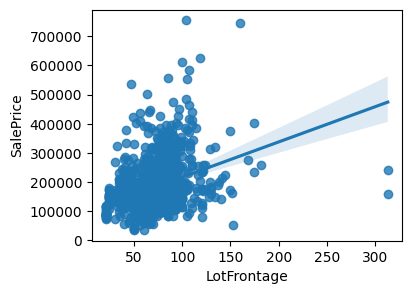

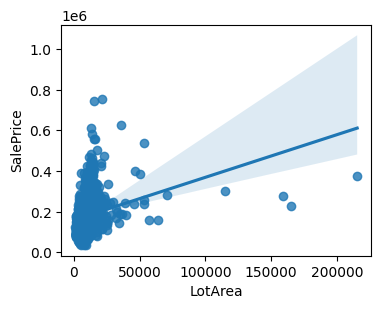

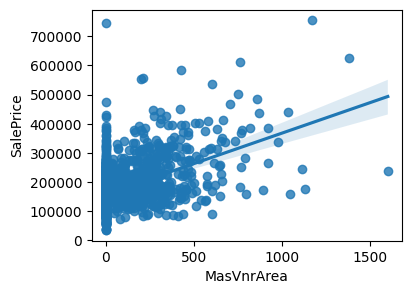

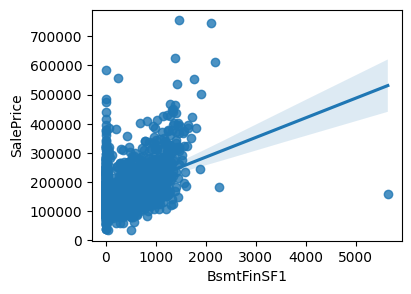

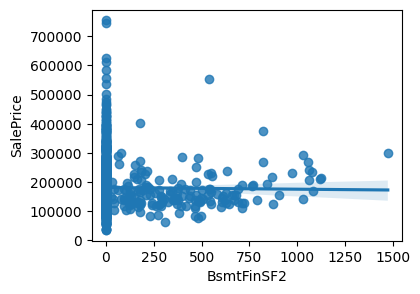

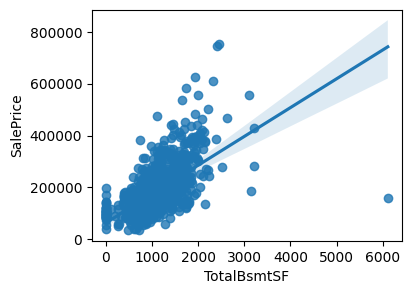

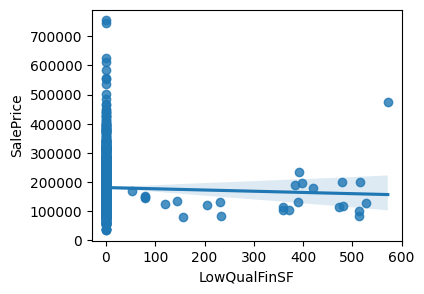

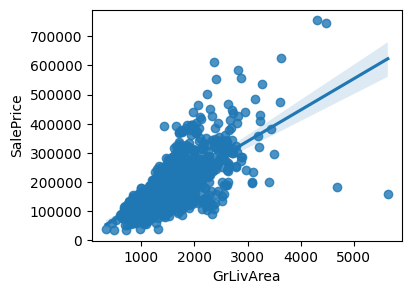

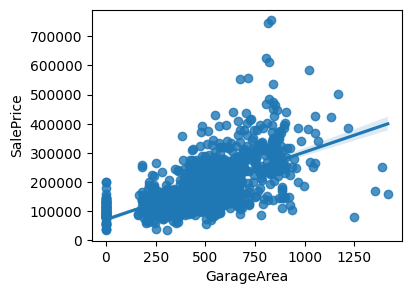

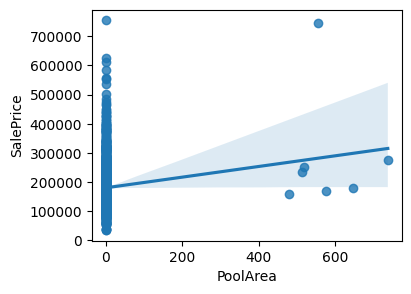

In [181]:
## get all columns with areas to find the relathon between them and price
areas = []
for i in numerical_columns:
    if (
        i.find("Area") != -1
        or i.find("Lot") != -1
        or i.find("FinSF") != -1
        or i.find("TotalBsmtSF") != -1
    ):
        areas.append(i)
print(areas)
visual.Scatter(areas, 0)

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


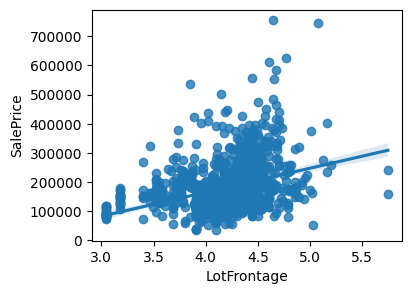

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


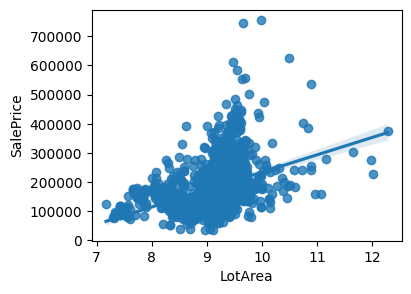

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/ahmed/.local/lib/python3.10/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ahmed/.local/lib/python3.10/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
/home/ahmed/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


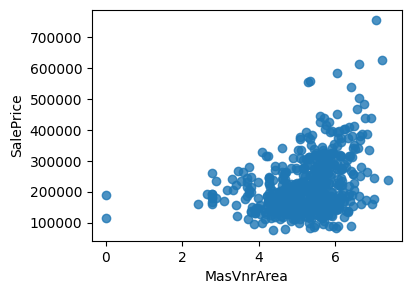

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/ahmed/.local/lib/python3.10/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ahmed/.local/lib/python3.10/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
/home/ahmed/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


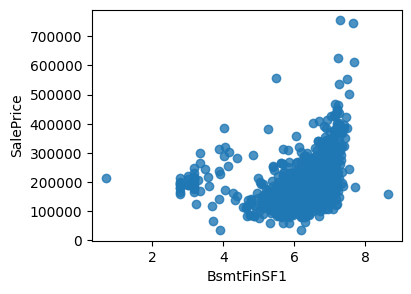

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/ahmed/.local/lib/python3.10/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ahmed/.local/lib/python3.10/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
/home/ahmed/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


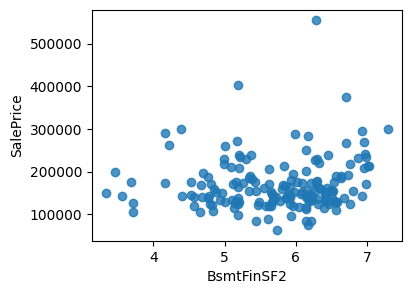

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/ahmed/.local/lib/python3.10/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ahmed/.local/lib/python3.10/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
/home/ahmed/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


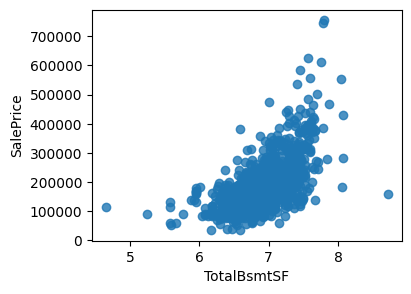

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/ahmed/.local/lib/python3.10/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ahmed/.local/lib/python3.10/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
/home/ahmed/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


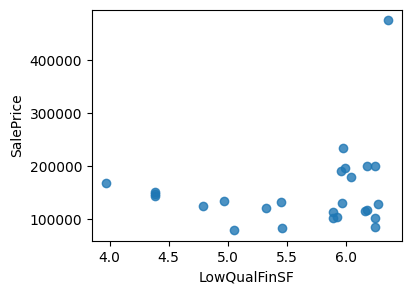

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


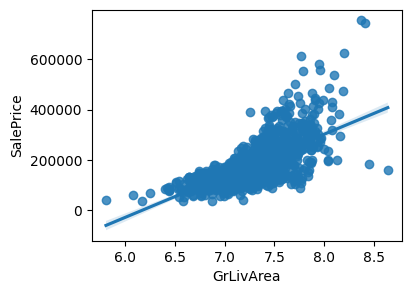

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/ahmed/.local/lib/python3.10/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ahmed/.local/lib/python3.10/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
/home/ahmed/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


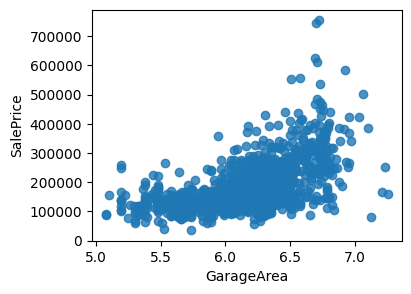

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/ahmed/.local/lib/python3.10/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ahmed/.local/lib/python3.10/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
/home/ahmed/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


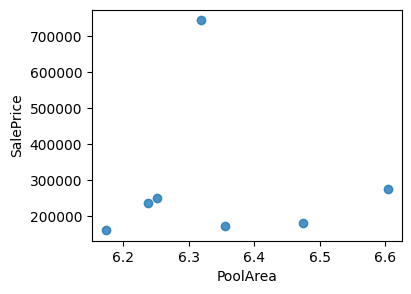

In [182]:
visual.Scatter(areas, 1)

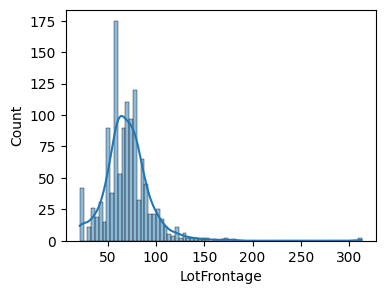

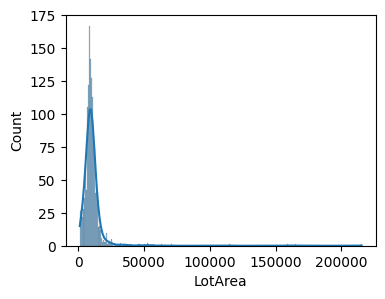

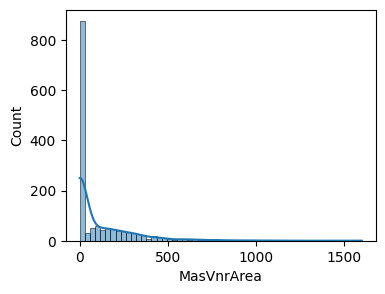

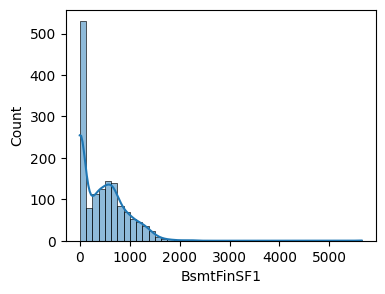

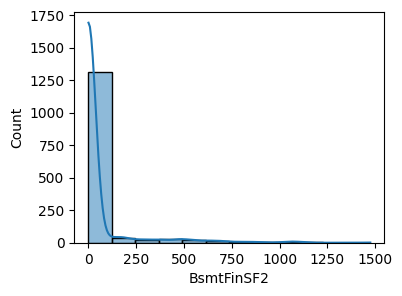

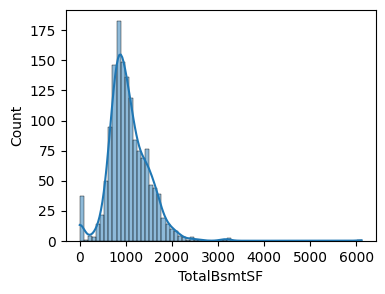

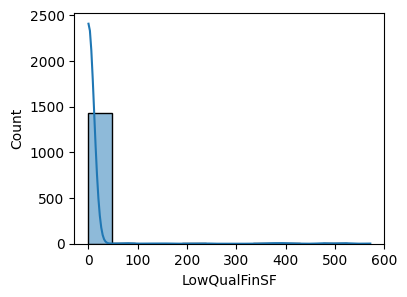

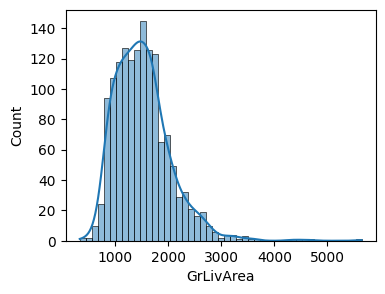

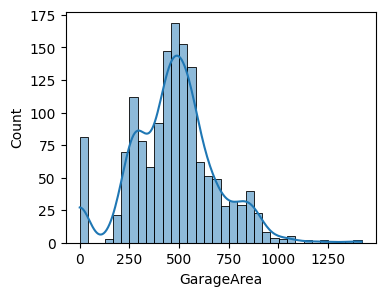

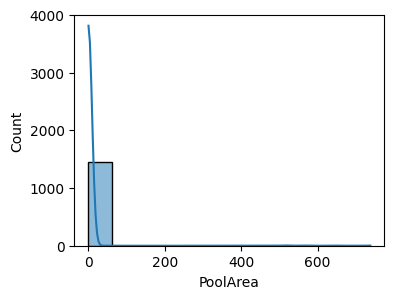

In [177]:
visual.distribution(areas, 0)

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


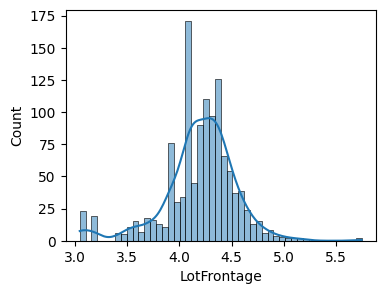

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


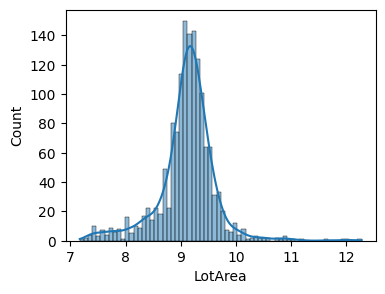

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


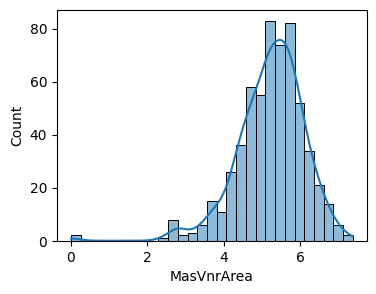

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


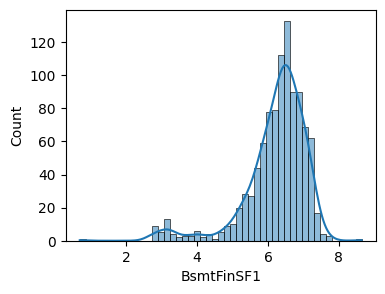

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


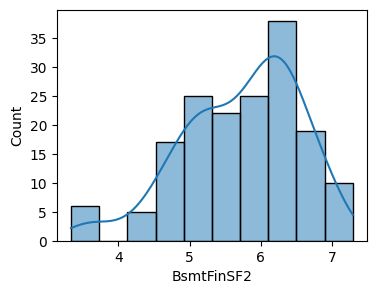

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


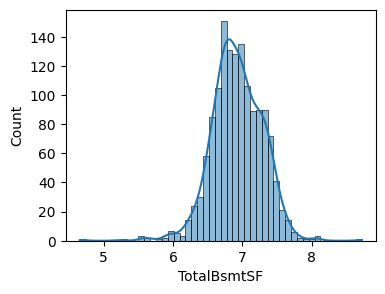

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


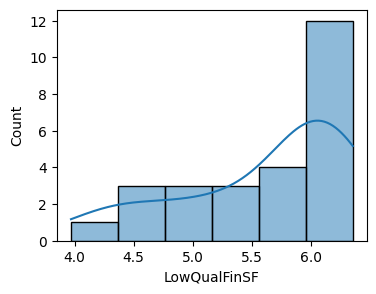

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


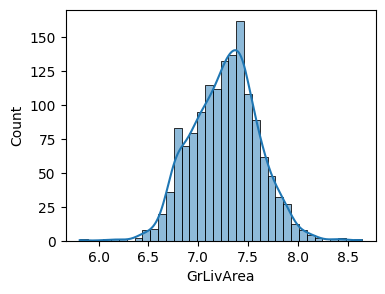

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


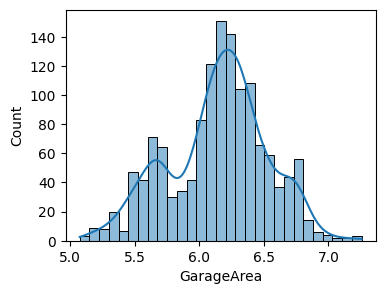

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


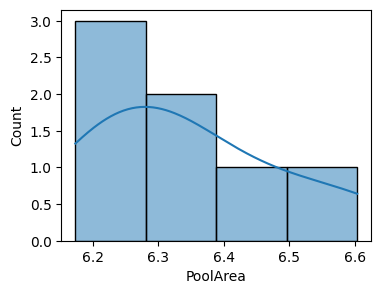

In [178]:
visual.distribution(areas, 1)

pool area, LowQualFinSF, BsmtFinSF2, don't have any effect

otherwise, have a linear relation, but some of them has an outliers

also they need to be scled to norimalize them


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


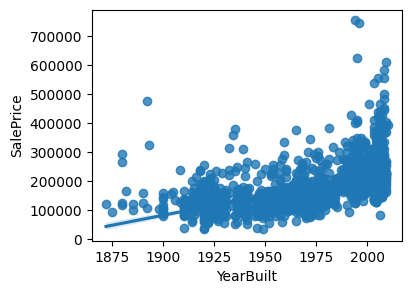

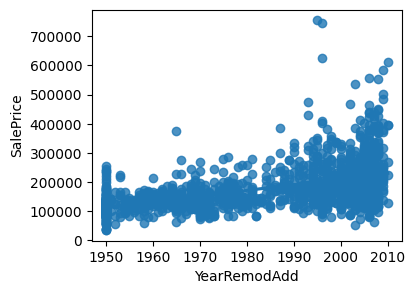

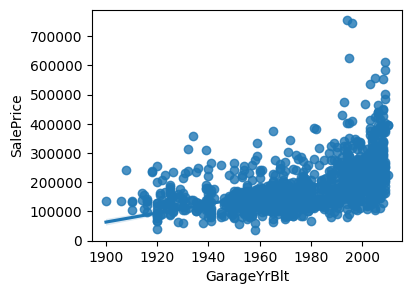

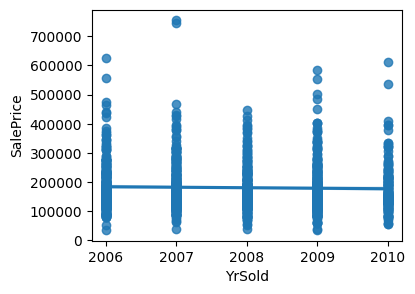

In [183]:
## get all columns with Year to find the relathon between them and price
Years = []
for i in numerical_columns:
    if i.find("Year") != -1 or i.find("Yr") != -1:
        Years.append(i)
print(Years)
visual.Scatter(Years, 0)

There is a linear relation between price and them, except YrSold


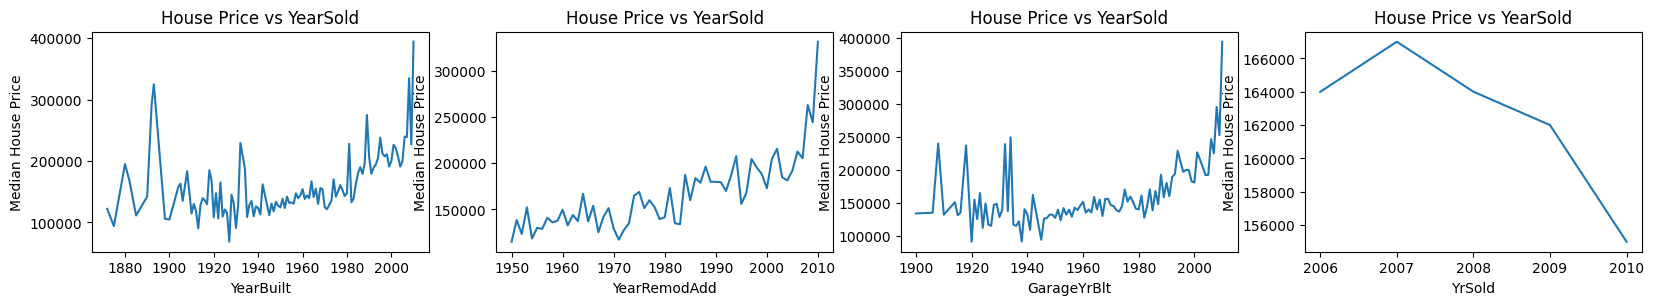

In [169]:
visual.years_lineplot(Years)

['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']


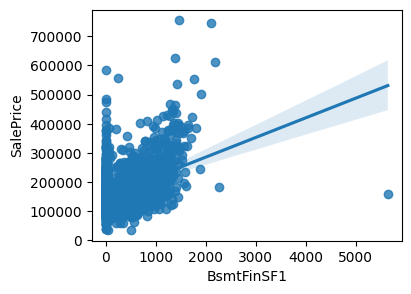

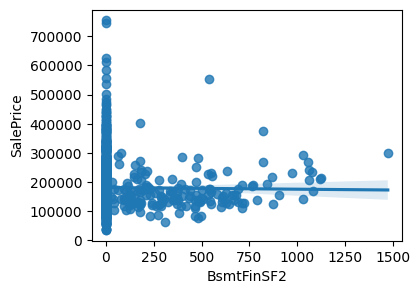

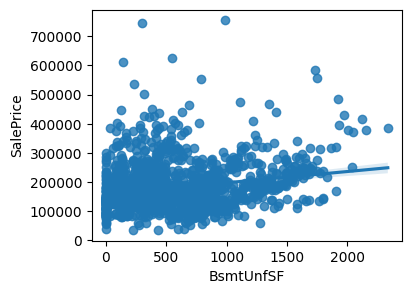

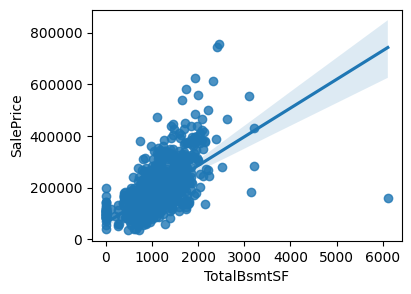

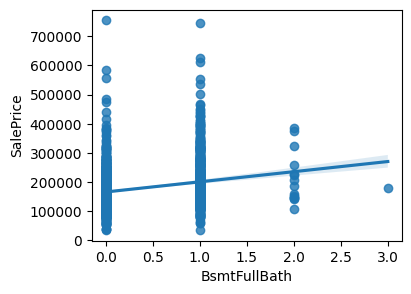

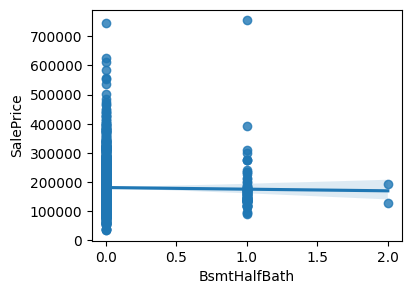

In [185]:
## get all columns with Bsmt to find the relathon between them and price
Bsmt = []
for i in numerical_columns:
    if i.find("Bsmt") != -1:
        Bsmt.append(i)
print(Bsmt)
visual.Scatter(Bsmt, 0)

FullBath, HalfBath and BsmtFinSF2 doesn't effect

the other columns have a kind of a relation but not strong


['BedroomAbvGr', 'KitchenAbvGr']


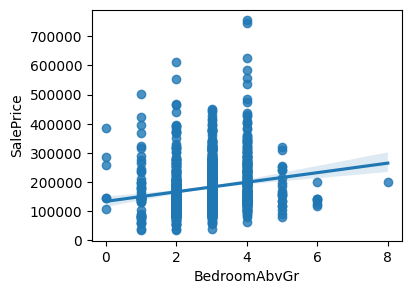

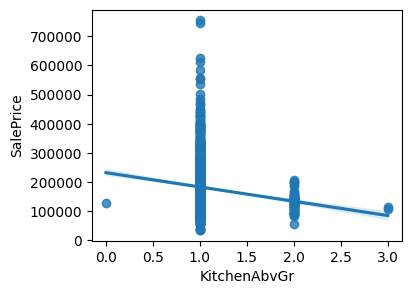

In [186]:
## get all columns with Kitchen and  Bed to find the relathon between them and price
KitchenBed = []
for i in numerical_columns:
    if i.find("Bed") != -1 or i.find("Kitchen") != -1:
        KitchenBed.append(i)
print(KitchenBed)
visual.Scatter(KitchenBed, 0)

### Note

##### Since they are many missing values, we need to find the relationship between missing values and Sales Price

##### You won't remove or drop the columns, wgen you find a missing values, because there is a possibility that this column has a relation with target¶


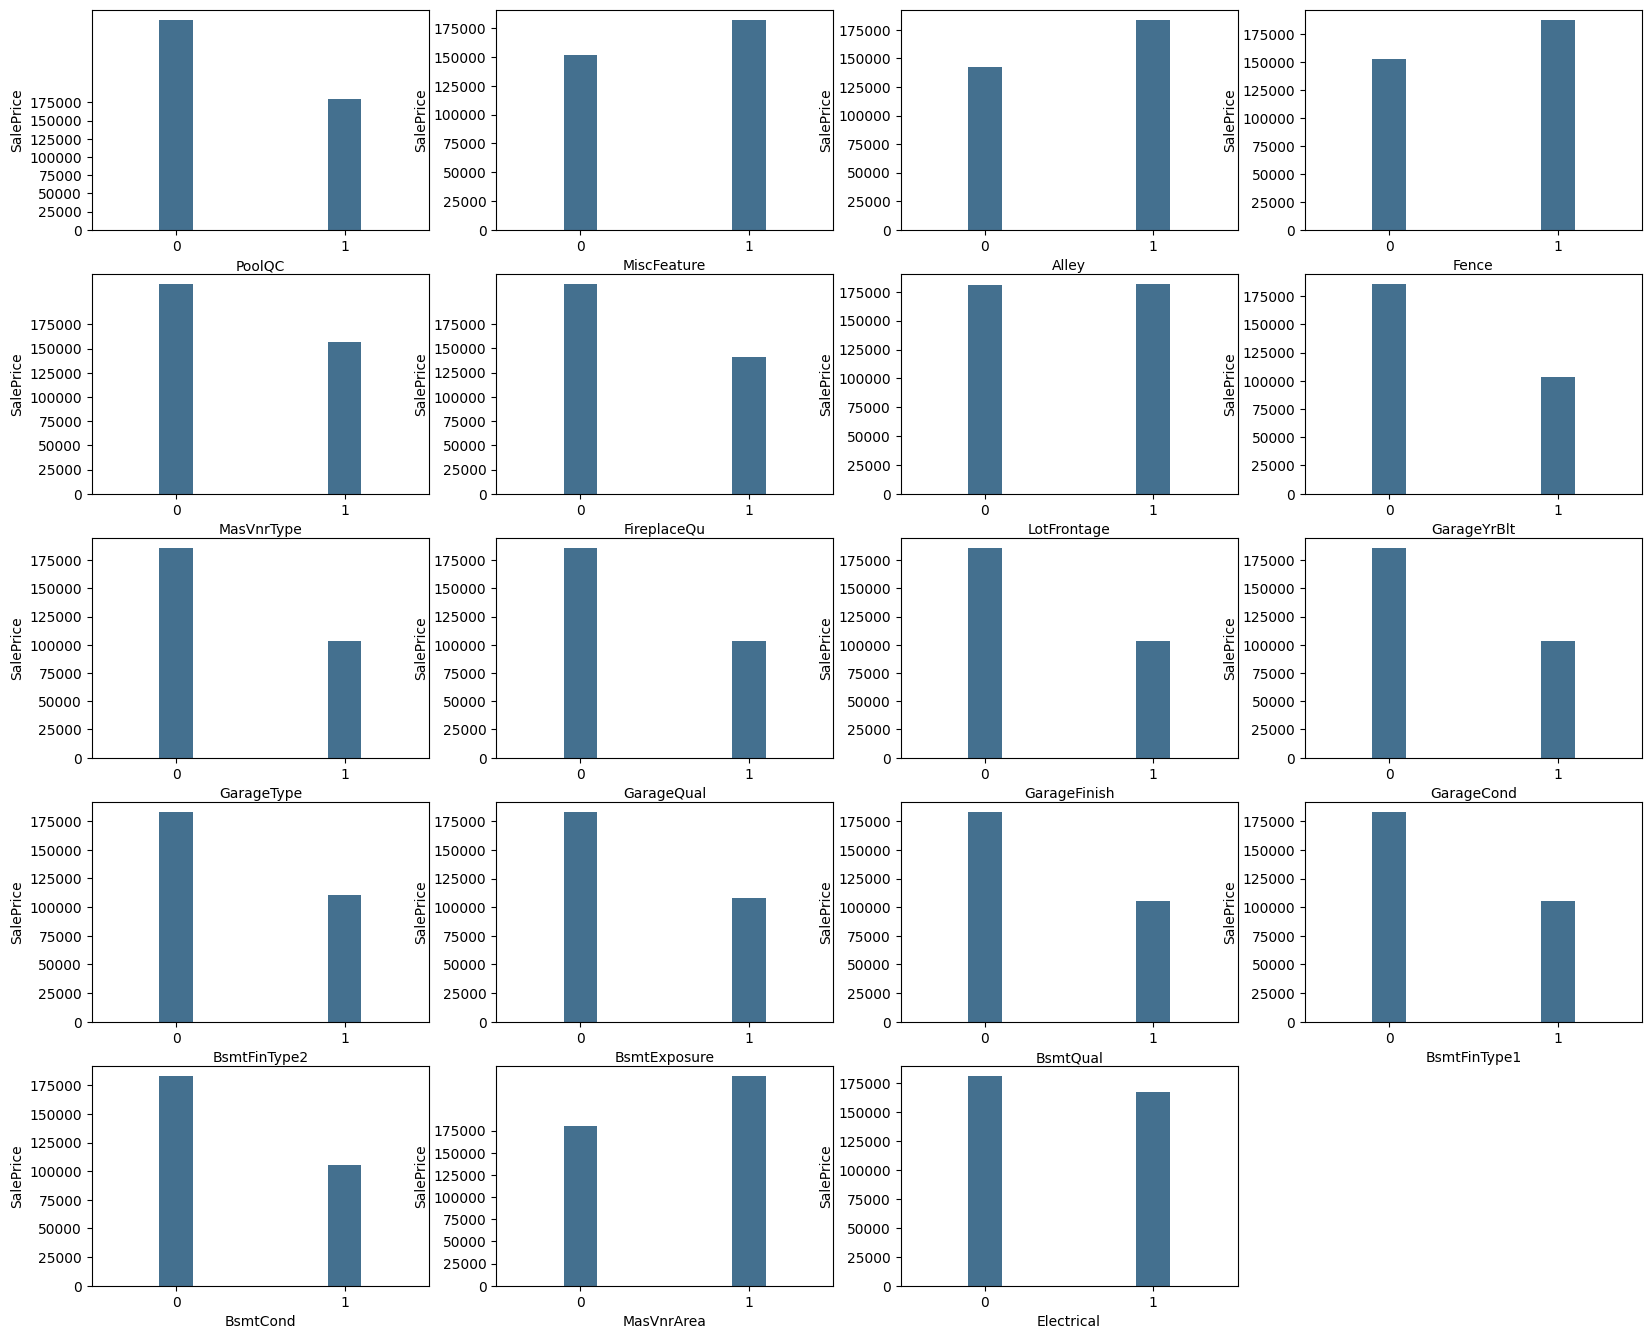

In [187]:
cols = []

for i, j in null_columns:
    cols.append(j)
visual.null_columns_relation(cols)

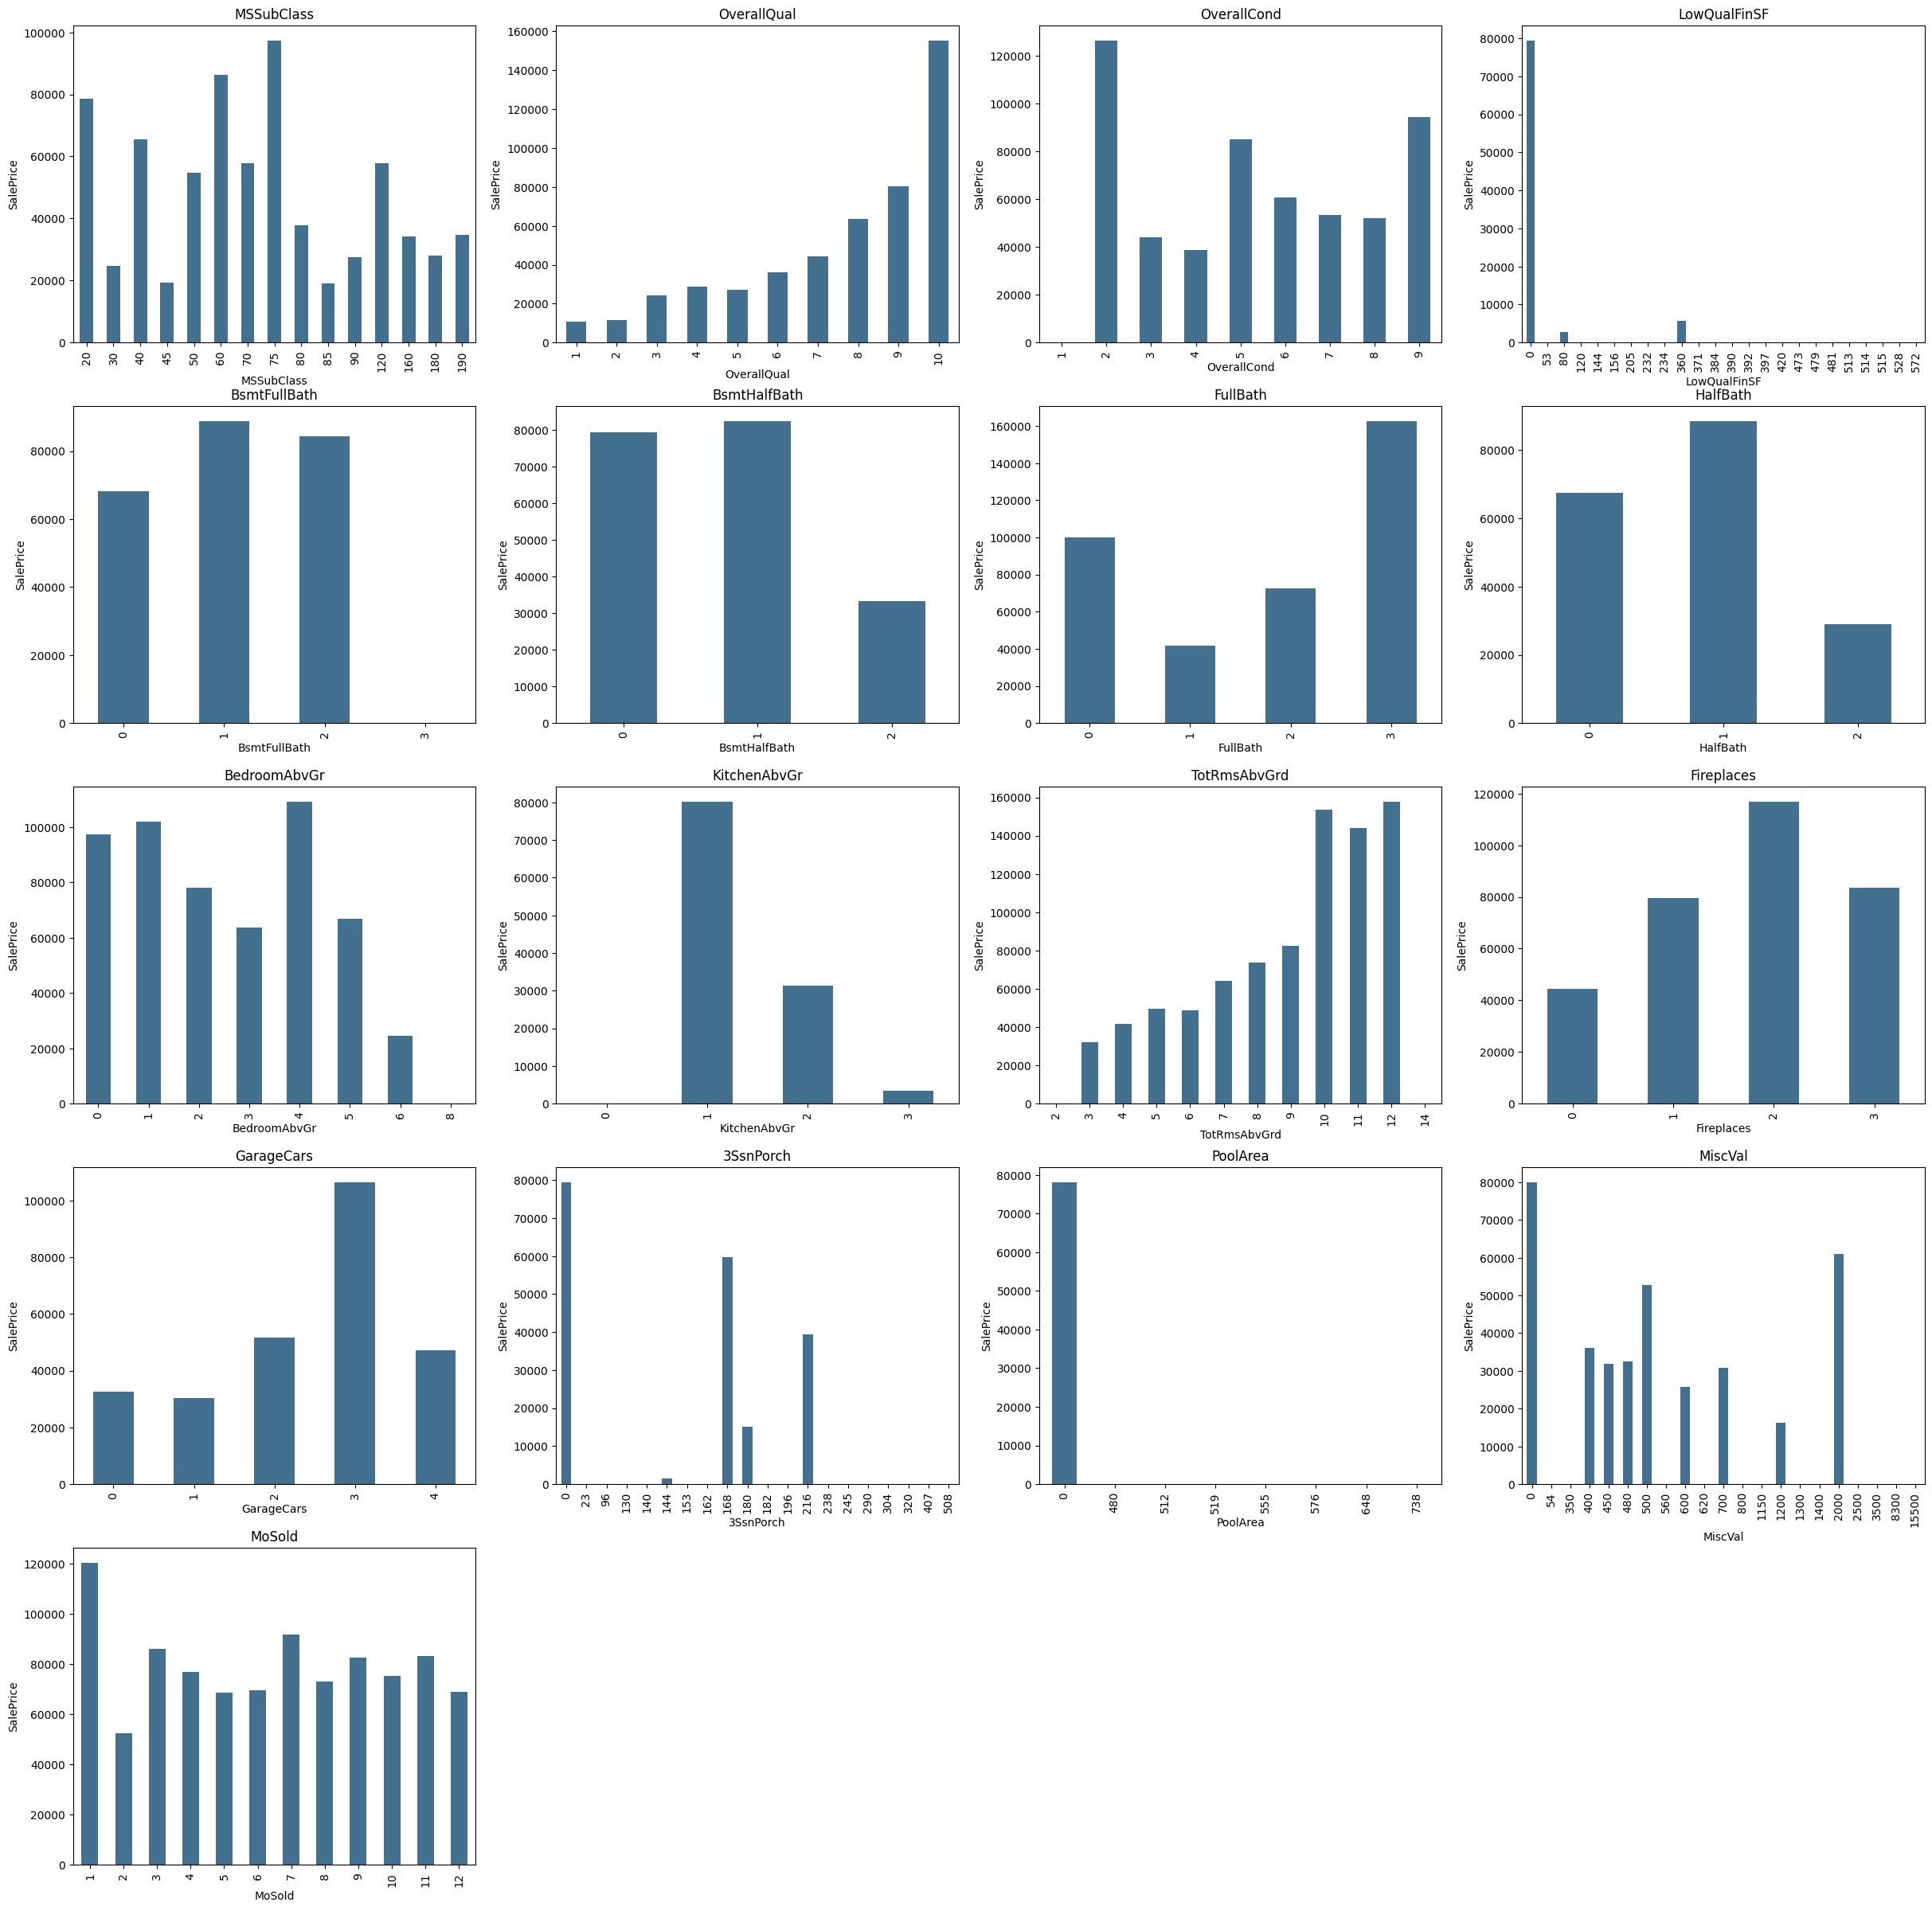

In [188]:
numerical_discrete = [
    col
    for col in numerical_columns
    if len(boston[col].unique()) < 25 and col not in Years
]

visual.numerical_discrete_columns(numerical_discrete)